In [1]:
import pandas as pd
from glob import glob

df = pd.concat(objs=[pd.read_csv(filepath_or_buffer=input_file, 
                                 parse_dates=['started_at', 'ended_at']
                                ) for input_file in glob('/kaggle/input/bike-share/*.csv')])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5779444 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 617.3+ MB


In [2]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    857860
start_station_id      857992
end_station_name      915655
end_station_id        915796
start_lat                  0
start_lng                  0
end_lat                 5795
end_lng                 5795
member_casual              0
dtype: int64

In [3]:
df.nunique()

ride_id               5779444
rideable_type               3
started_at            4862473
ended_at              4875344
start_station_name       1820
start_station_id         1498
end_station_name         1821
end_station_id           1498
start_lat              772920
start_lng              730231
end_lat                 13720
end_lng                 13834
member_casual               2
dtype: int64

In [4]:
df.sample(n=10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
225182,89E2843F02441746,electric_bike,2023-04-24 17:54:16,2023-04-24 18:00:18,Racine Ave & Wrightwood Ave,TA1309000059,Clark St & Wrightwood Ave,TA1305000014,41.928934,-87.658931,41.929546,-87.643118,casual
683518,92731A72802E78D3,electric_bike,2022-09-17 22:11:12,2022-09-17 22:22:40,NaN,NaN,Southport Ave & Wrightwood Ave,TA1307000113,41.950000,-87.660000,41.928773,-87.663913,casual
50798,175CC825289DBA77,electric_bike,2023-02-04 23:20:33,2023-02-04 23:32:15,Campbell Ave & North Ave,13257,NaN,NaN,41.910559,-87.689553,41.890000,-87.680000,casual
94002,CD2555C91F0CFBB3,electric_bike,2022-09-06 12:15:08,2022-09-06 12:34:51,Sacramento Blvd & Polk St,419,Loomis St & Lexington St,13332,41.870000,-87.700000,41.872187,-87.661501,casual
164437,80B2D3F1F0123797,electric_bike,2023-03-28 08:08:22,2023-03-28 08:20:24,Larrabee St & Webster Ave,13193,State St & Kinzie St,13050,41.921836,-87.644038,41.889375,-87.627077,member
32740,BA54516A1F644646,classic_bike,2022-12-07 07:38:24,2022-12-07 07:40:05,Peoria St & Jackson Blvd,13158,900 W Harrison St,13028,41.877642,-87.649618,41.874754,-87.649807,member
447418,93360ABB33F0746E,classic_bike,2022-07-08 00:54:35,2022-07-08 00:58:53,Kingsbury St & Erie St,13265,Ogden Ave & Chicago Ave,TA1305000020,41.893808,-87.641697,41.896362,-87.654061,member
511168,BCE04433C5B652C0,classic_bike,2022-07-02 15:46:44,2022-07-02 15:52:56,University Ave & 57th St,KA1503000071,Kimbark Ave & 53rd St,TA1309000037,41.791478,-87.599861,41.799568,-87.594747,member
47682,B181FA2EE450347C,electric_bike,2022-11-25 16:35:11,2022-11-25 16:35:33,LaSalle Dr & Huron St,KP1705001026,LaSalle Dr & Huron St,KP1705001026,41.894526,-87.632372,41.894877,-87.632326,member
32299,C49D81245FD857AB,electric_bike,2022-12-11 11:31:38,2022-12-11 11:46:41,Ritchie Ct & Banks St,KA1504000134,Dusable Harbor,KA1503000064,41.906758,-87.626146,41.886976,-87.612813,casual


<Axes: >

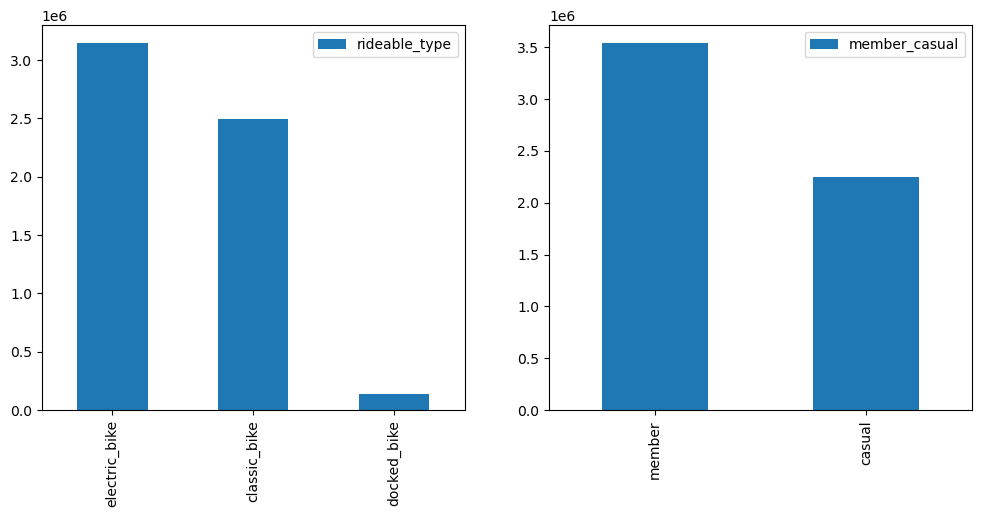

In [5]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 5), ncols=2,)
df['rideable_type'].value_counts().plot(ax=ax[0], kind='bar', legend=True)
df['member_casual'].value_counts().plot(ax=ax[1], kind='bar', legend=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='rideable_type', ylabel='member_casual'>

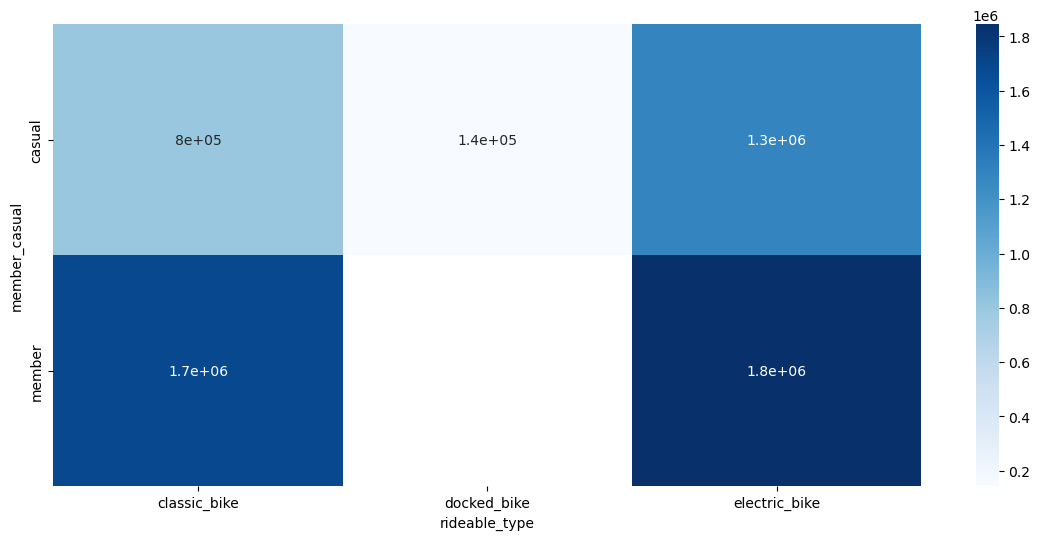

In [6]:
from seaborn import heatmap
_, ax = subplots(figsize=(14, 6),)
person_bike = ['rideable_type', 'member_casual']
heatmap(annot=True, cmap='Blues', data=pd.pivot_table(data=df[person_bike].groupby(person_bike).size().reset_index(),
                                          index=person_bike[1], columns=person_bike[0], values=0), square=False, )

<Axes: xlabel='start_lng', ylabel='start_lat'>

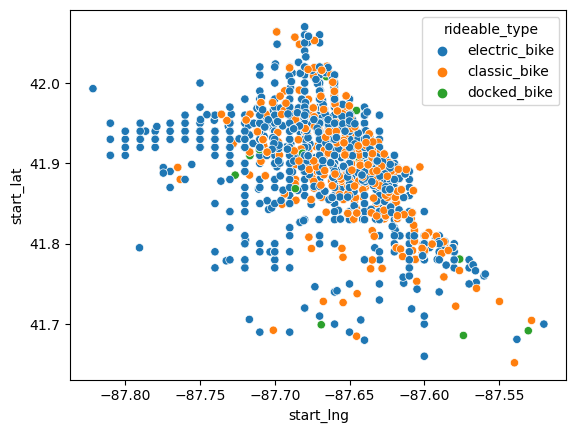

In [7]:
from seaborn import scatterplot
scatterplot(data=df.sample(n=10000), y='start_lat', x='start_lng', hue='rideable_type')

In [8]:
import plotly.graph_objects as go

sample_df = df.sample(n=50000)
fig = go.Figure(data=go.Scattergeo(
        lon = sample_df['start_lng'],
        lat = sample_df['start_lat'],
        text = sample_df['member_casual'],
        mode = 'markers',
#         marker_color = sample_df['rideable_type']
        ))

fig.update_layout(
        title = 'Bikes!',
        geo_scope='usa'
    )
fig.update_geos(fitbounds='locations')
fig.show()
